In [1]:
import sim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from pretty_plots import plot_pretty

In [2]:
plot_pretty()

In [3]:
def vol(r):
    return (4/3) * np.pi * r**3
def mipd(n,r):
    return vol(r)/n

n = 1000000
r = 1

ray = sim.utils.ray(np.array([1,0,0]),r*2,25)
analytics = sim.halos.Analytic.Uniform(ray,r=r)
rs = sim.utils.points2radius(ray)

runs = {}

eps_fracs = [0,1/10,1,10,100]
all_means = []

for eps_frac in eps_fracs:
    means = []
    maxs = []
    variances = []
    ns = []
    xs = []
    downsamples = 2**np.arange(0,16)

    for i in range(5):
        df = sim.halos.Sample.Uniform(n,r=r)
        for downsample in tqdm(downsamples):
            xs.append(downsample)
            downsampled_df = sim.halos.downsample(df,downsample)
            ns.append(len(downsampled_df.index))
            eps = mipd(len(downsampled_df.index),r) * eps_frac
            out,time = sim.static_solver.evaluate(ray,downsampled_df,precision="f8",eps=eps)
            diff = out-analytics
            variances.append(np.var(diff))
            rdiff = np.abs(diff)/np.abs(analytics)
            means.append(np.mean(rdiff))
            maxs.append(np.max(rdiff))
    
    runs[eps_frac] = {"mean":means[:],"max":maxs[:],"var":variances[:],"xs":xs[:]}

print(max(ns),"to",min(ns))

100%|██████████| 16/16 [00:01<00:00,  8.13it/s]

1000000 to 30


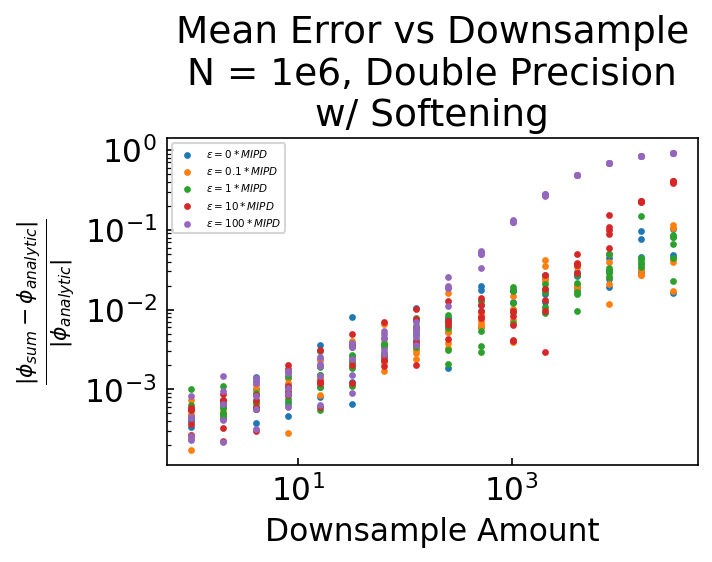

In [6]:
s = 5
for eps_frac in runs.keys():
    plt.scatter(np.array(runs[eps_frac]["xs"]),runs[eps_frac]["mean"],label=r"$\epsilon = " + str(eps_frac) + r"*MIPD$",s=s)
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r"$\frac{|\phi_{sum} - \phi_{analytic}|}{|\phi_{analytic}|}$")
plt.xlabel(r"Downsample Amount")
plt.title("Mean Error vs Downsample\nN = 1e6, Double Precision\nw/ Softening")
plt.legend()
plt.tight_layout()
plt.savefig('plots/downsample/mean_error_plummer_f8.jpg')
plt.show()

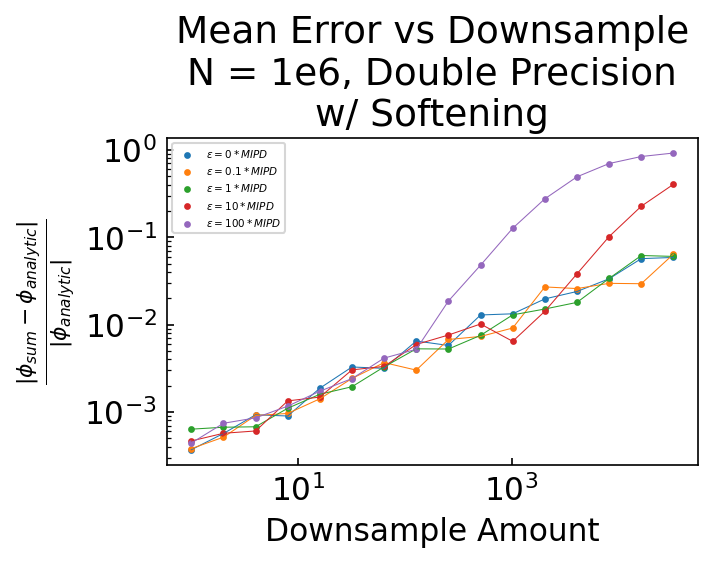

In [7]:
for eps_frac in runs.keys():
    mean = np.array(runs[eps_frac]["mean"])
    xs = np.array(runs[eps_frac]["xs"])
    mean = np.mean(mean.reshape((5,mean.shape[0]//5)),axis=0)
    xs = xs.reshape(5,xs.shape[0]//5)[0]
    plt.scatter(xs,mean,label=r"$\epsilon = " + str(eps_frac) + r"*MIPD$",s=5)
    plt.plot(xs,mean,linewidth=0.5)
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.ylabel(r"$\frac{|\phi_{sum} - \phi_{analytic}|}{|\phi_{analytic}|}$")
plt.xlabel(r"Downsample Amount")
plt.title("Mean Error vs Downsample\nN = 1e6, Double Precision\nw/ Softening")
plt.tight_layout()
plt.savefig('plots/downsample/mean2_error_plummer_f8.jpg')
plt.show()